# Feature Detection

국민대학교 차량지능특론 SLAM 파트 과제 1

- 학번 : M2020527
- 이름 : 김용환

---

OpenCV를 사용하여 다음과 같은 다양한 feature detection 알고리즘을 사용해본다.

- Harris corner detection
- FAST
- ORB (Oriented FAST and Rotated BRIEF)
- SIFT (Scale-Invariant Feature Transform)
- SURF (Speeded-Up Robust Features)


**참고**

- [OpenCV tutorial - Feature Detection and Description](https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html)
- [OpenCV document](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html)
- [이미지 특징 추출 (데이터 사이언스 스쿨)](https://datascienceschool.net/view-notebook/7eb4b2a440824bb0a8c2c7ce3da7a4e2/)

---

**[중요] 과제 제출 방법**
- 과제 제출 기한은 2021년 6월 14일까지입니다.
- 과제는 Colab에서 작성한 것을 다운받아 (파일-.ipynb 다운로드) 가상 대학에 업로드합니다. (이외의 제출 방법은 인정하지 않음)
- 제출 시 파일 제목은 '학번_이름' 으로 저장합니다.

# OpenCV 버전 변경

SIFT, SURF Feature 사용을 위해 현재 Colab 서버에 설치되어 있는 OpenCV 버전을 변경한다.

In [ ]:
!pip3 uninstall opencv-python
!pip3 install -U opencv-contrib-python==3.4.2.17

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 135kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
# 관련 패키지 임포트
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
numpy 1.19.5
opencv 3.4.2


## Google Drive와 연동하기

구글 드라이브와 colab을 연동하여 드라이브에 있는 파일들을 가져올 수 있게 한다.

- 아래 코드를 실행
- 출력된 링크를 클릭해 구글 계정 로그인 
- 로그인 후 나오는 코드를 복사하여 붙여넣기

[참고: 코랩 사용법 (데이터 사이언스 스쿨)](https://datascienceschool.net/view-notebook/f9d9fddb7cc7494a9e4be99f0e137be0/)


In [ ]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


좌측의 파일 아이콘을 선택하거나 아래 명령어를 통해 파일을 확인할 수 있다.

In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/'

work1


In [ ]:
ROOT = '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/work1/'

### opencv를 사용해 이미지 불러오기

- `cv.imread()`를 이용해 이미지를 불러오면 RGB가 아닌 BGR 이미지임을 유의해야 한다.

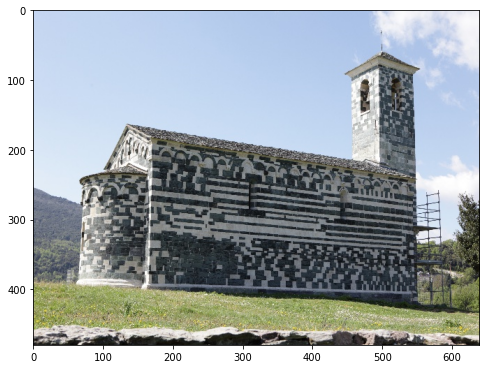

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.show()

## Harris Corner Detection

해리스 코너 추출 함수 `cornerHarris`는 이미지 위에 커널을 이동시키면서 그레디언트의 변화량을 구하고 이 값을 적절한 기준값으로 구별하여 코너점을 찾는다.

**과제**
- 해리스 코너를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수
`dst	=	cv.cornerHarris(	src, blockSize, ksize, k[, dst[, borderType]]	)` 


In [ ]:
from google.colab.patches import cv2_imshow

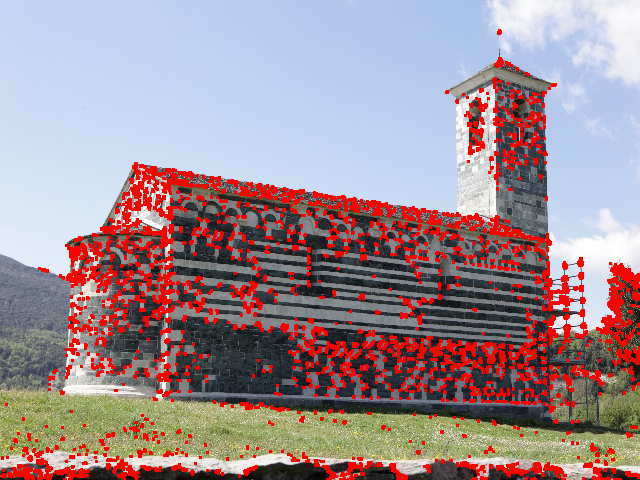

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2_imshow(img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()
# To-do

### Fast Corner Detection 

연산이 빠른 corner detection 알고리즘이다 


**과제**
- FAST feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.FastFeatureDetector_create(	[, threshold[, nonmaxSuppression[, type]]]	)`

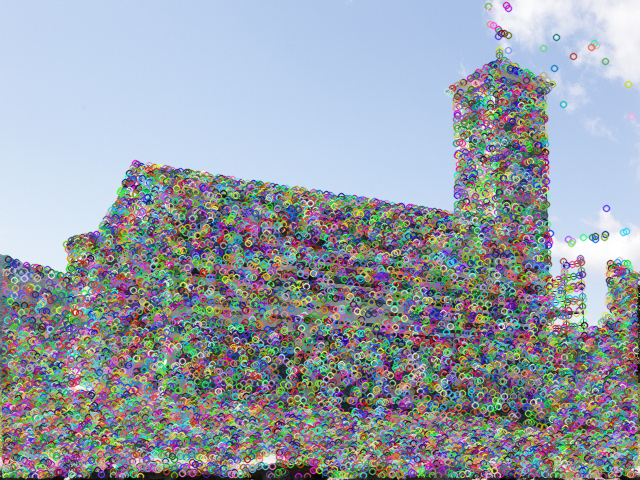

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
retval = cv.FastFeatureDetector_create()
kp = retval.detect(img,None)

retval = cv.FastFeatureDetector_create()
kp = retval.detect(img,None)
img2=cv.drawKeypoints(img,kp,None)

cv2_imshow(img2)
cv.waitKey()
cv.destroyAllWindows()

### ORB(Oriented FAST and Rotated BRIEF) detector

FAST 와 BRIEF를 기반으로 만들어진 알고리즘이다. 논문에서는 SURF와 SIFT보다 매우 빠르고, SURF 보다 정확한, 낮은 컴퓨팅 파워 환경에서 돌리기에 좋은 알고리즘이라 소개 한다.

**과제**
-  ORB feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.ORB_create(	[, nfeatures[, scaleFactor[, nlevels[, edgeThreshold[, firstLevel[, WTA_K[, scoreType[, patchSize[, fastThreshold]]]]]]]]]	)`


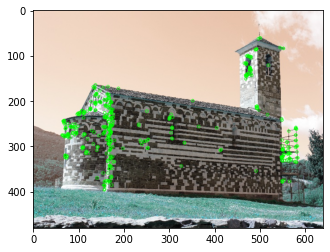

(<matplotlib.image.AxesImage at 0x7f3698afbe50>, None)

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# ORB 검출기 시작
orb = cv.ORB_create ()
# ORB로 키포인트 찾기
kp = orb.detect (img, None )
# ORB로 설명자를 계산
kp, des = orb.compute (img, kp)
# 크기와 방향이 아닌 키포인트 위치 만 그립니다.
img2 = cv.drawKeypoints (img, kp, None , color = (0,255,0), flags = 0)
plt.imshow (img2), plt.show ()
# To-do

### SIFT feature detection

SIFT(Scale-Invariant Feature Transform)은 특징점의 크기와 각도까지 같이 계산하여 이미지의 크기가 변하거나 회전해도 동일한 특징점을 찾을 수 있도록 하는 방법이다. 또한 특징점 근처의 이미지 특성(히스토그램)도 같이 계산해서 특징점 이미지의 모양도 구별할 수 있도록 한다.

**과제**
- SIFT feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`retval	=	cv.SIFT_create(	[, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]]	)
`

In [ ]:
# 아래 패키지를 임포트한다 
!pip install --upgrade pip

!pip install opencv-contrib-python-nonfree


     |████████████████████████████████| 1.6MB 30.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
ERROR: Could not find a version that satisfies the requirement opencv-contrib-python-nonfree (from versions: none)
ERROR: No matching distribution found for opencv-contrib-python-nonfree


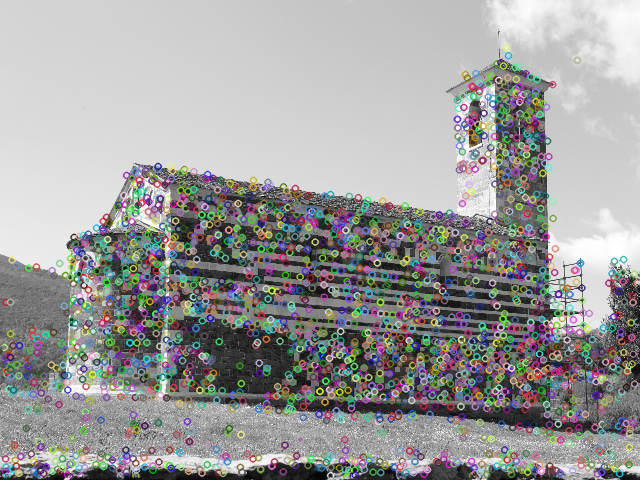

In [ ]:
import cv2 as cv
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sift = cv.xfeatures2d.SIFT_create()

kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)
cv.imwrite('sift_keypoints.jpg',img)

cv2_imshow(img)

### SURF feature detection


SURF(Speeded-Up Robust Features)는 인텐서티 계산 방법을 간략화 하는 등의 방법으로 SIFT 방법의 속도와 안정성을 개선한 것이다. 

**과제**
- SURF feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수
- `retval	=	cv.xfeatures2d.SURF_create(	[, hessianThreshold[, nOctaves[, nOctaveLayers[, extended[, upright]]]]]	)
`


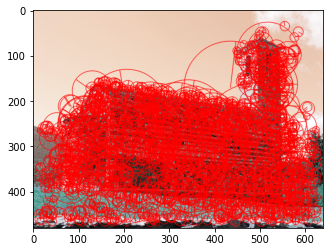

(<matplotlib.image.AxesImage at 0x7f369887c4d0>, None)

In [ ]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

surf = cv.xfeatures2d.SURF_create (400)
kp, des = surf.detectAndCompute (img, None )
img2 = cv.drawKeypoints (img, kp, None , (255,0,0), 4)
plt.imshow (img2), plt.show ()
# To-do

### 추가 점수 과제

- 지금까지 사용해본 feature detection 알고리즘들을 조사해 보고, 각 알고리즘간의 차이와 장단점을 서술하시오.

feature detecion 알고리즘의  SIFT(Scale Invariant Feature Transform)에서 사용하는 특징점 추출 방법입니다. SIFT에서는 기존의 Harris 코너가 영상의 스케일 변화에 민감한 문제를 해결하기 위하여 DoG(Difference of Gaussian)를 기반으로 이미지 내에서 뿐만 아니라 스케일 축으로도 코너성이 극대인 점을 찾습니다.

FAST(Features from Accelerated Segment Test)는 영국 캠브리지 대학의 Edward Rosten이 개발한 방법으로 FAST라는 이름에서 알 수 있듯이 극도의 빠름을 추구한 특징점 추출 방법입니다. 하지만 FAST가 정말 뛰어난 점은 FAST가 속도에 최적화되어 설계된 기술임에도 불구하고 그 특징점의 품질(repeatability: 다양한 영상 변화에서도 동일한 특징점이 반복되어 검출되는 정도) 또한 기존의 방법들(Harris, DoG, ...)을 상회한다는 점에 있습니다.
